# Week 4 - Architecture Implementation-Cats and Dogs

In [37]:
!wget --no-check-certificate \
    https://drive.google.com/file/d/1ejyQe12TIHjOHj6oT5dxHVwcwap41TuV/view \
    -O /tmp/Face_Mask.zip

/bin/bash: /home/mca/anaconda3/envs/dse/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2024-08-22 14:43:33--  https://drive.google.com/file/d/1ejyQe12TIHjOHj6oT5dxHVwcwap41TuV/view
Resolving drive.google.com (drive.google.com)... 142.250.183.14, 2404:6800:4009:820::200e
Connecting to drive.google.com (drive.google.com)|142.250.183.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/Face_Mask.zip’

/tmp/Face_Mask.zip      [ <=>                ]  87.05K  --.-KB/s    in 0.07s   

2024-08-22 14:43:34 (1.16 MB/s) - ‘/tmp/Face_Mask.zip’ saved [89139]



In [2]:
pwd

'/home/mca/220968002_Keerthan_DSE_B/Week4'

### Extracting files and storing in the directory

In [18]:
import os
import zipfile

local_zip = './Face_Mask.zip'
extract_to = './tmp'#./has to be there to tell to extract to it

# Ensure the target directory exists
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract the ZIP file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [26]:
base_dir = '/tmp/Face Mask Dataset'#see from the extracted and then do
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir,'Test')
# Directory with our training mask pictures
train_mask_dir = os.path.join(train_dir, 'WithMask')#withmask and all are folder names from the extracted ones

# Directory with our training without_masks pictures
train_without_mask_dir = os.path.join(train_dir, 'WithoutMask')

# Directory with our validation mask pictures
validation_mask_dir = os.path.join(validation_dir, 'WithMask')

# Directory with our validation without_masks pictures
validation_without_mask_dir = os.path.join(validation_dir, 'WithoutMask')

#Directory with our tests masks and without masks pictures
test_mask_dir = os.path.join(test_dir,'WithMask')
test_without_mask_dir = os.path.join(test_dir,'WithoutMask')

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with the preprocessing function
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)#rescale does is to 255 to 0 to 1 normalize
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'grayscale'
)
#so if gray scale just write in generator to have gray scale it will work


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [27]:
train_mask_fnames = os.listdir(train_mask_dir)
print(train_mask_fnames[:10])

train_without_masks_fnames = os.listdir(train_without_mask_dir)
train_without_masks_fnames.sort()
print(train_without_mask_dir[:10])

['Augmented_688_8518705.png', 'Augmented_390_5767773.png', '24.png', 'Augmented_146_3909832.png', 'Augmented_753_8650300.png', 'Augmented_313_2559162.png', 'Augmented_403_9395535.png', '1644.png', 'Augmented_804_8852684.png', 'Augmented_865_557628.png']
/tmp/Face 


### Viewing images from the directory

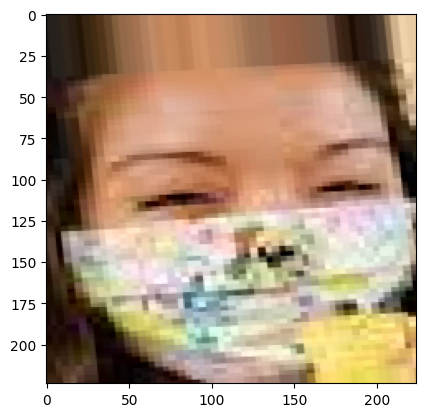

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_mask_dir, train_mask_fnames[11])))

In [32]:
im = mpimg.imread(os.path.join(train_mask_dir, train_mask_fnames[0]))
im.shape

(224, 224, 3)

# LENET Architecture Implementation

In [33]:
#Implementing the Lenet Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
lenetcnn = Sequential()
lenetcnn.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh',padding="same",input_shape=(28,28,1)))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh',padding='valid'))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Flatten())
lenetcnn.add(Dense(120, activation='tanh'))
lenetcnn.add(Dense(84, activation='tanh'))
lenetcnn.add(Dense(1, activation='sigmoid'))
lenetcnn.summary()
#valid padding means no padding the input size reduces same padding means the zero padding is added to have output as same as input

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

2024-08-22 14:41:09.233341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-22 14:41:09.344349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-22 14:41:09.344730: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [34]:
lenetcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
#fitting the model
history = lenetcnn.fit(train_generator, epochs=20, validation_data=val_generator)#direct generator we can pass

Epoch 1/20


2024-08-22 14:44:12.474883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-08-22 14:44:13.326711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-08-22 14:44:13.341480: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1de5e370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-22 14:44:13.341499: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-22 14:44:13.368442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-22 14:44:13.519721: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

313/313 [==============================] - 11s 25ms/step - loss: 0.2461 - accuracy: 0.8961 - val_loss: 0.1367 - val_accuracy: 0.9400
Epoch 2/20
313/313 [==============================] - 8s 24ms/step - loss: 0.1213 - accuracy: 0.9560 - val_loss: 0.1084 - val_accuracy: 0.9525
Epoch 3/20
313/313 [==============================] - 8s 24ms/step - loss: 0.0976 - accuracy: 0.9661 - val_loss: 0.1274 - val_accuracy: 0.9488
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 0.0900 - accuracy: 0.9668 - val_loss: 0.1041 - val_accuracy: 0.9600
Epoch 5/20
313/313 [==============================] - 8s 24ms/step - loss: 0.0730 - accuracy: 0.9736 - val_loss: 0.0923 - val_accuracy: 0.9650
Epoch 6/20
313/313 [==============================] - 8s 24ms/step - loss: 0.0632 - accuracy: 0.9770 - val_loss: 0.0863 - val_accuracy: 0.9712
Epoch 7/20
313/313 [==============================] - 8s 24ms/step - loss: 0.0564 - accuracy: 0.9806 - val_loss: 0.0829 - val_accuracy: 0.9725
Epoch 8/2

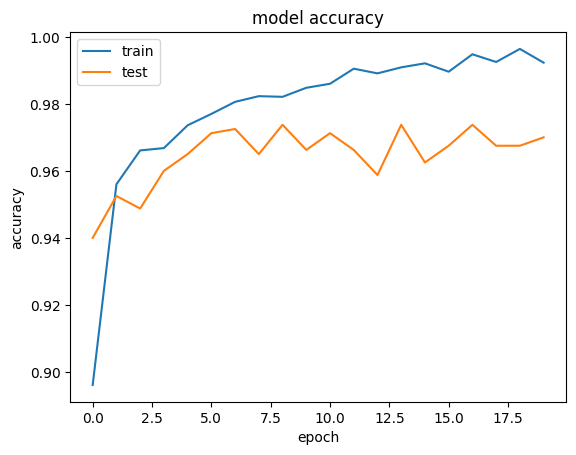

In [40]:
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

##### model performs quite well for the given dataset with a bit of overfitting

In [49]:
#Evaluation of the model
lenetcnn.evaluate(test_generator, batch_size=32)

31/31 [==============================] - 1s 22ms/step - loss: 0.1171 - accuracy: 0.9627


[0.11711597442626953, 0.9627016186714172]

##### Good evalution results for the lenet model on the test data seen

# Alexnet Architecture Implementation

In [50]:

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (227,227),
    batch_size = 32,
    class_mode = 'binary',
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [42]:
alexnet = Sequential()
alexnet.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= (227,227,3),
                        kernel_initializer= 'he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))
alexnet.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

alexnet.add(Conv2D(384, kernel_size=(3,3), strides= 1,
              padding= 'same', activation= 'relu',
              kernel_initializer= 'he_normal'))

alexnet.add(Conv2D(384, kernel_size=(3,3), strides= 1,
              padding= 'same', activation= 'relu',
              kernel_initializer= 'he_normal'))

alexnet.add(Conv2D(256, kernel_size=(3,3), strides= 1,
              padding= 'same', activation= 'relu',
              kernel_initializer= 'he_normal'))

alexnet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                    padding= 'valid', data_format= None))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation= 'relu'))
alexnet.add(Dense(4096, activation= 'relu'))
alexnet.add(Dense(1000, activation= 'relu'))
alexnet.add(Dense(1, activation= 'sigmoid'))#actual it is softmax but we are doing a binary classification so sigmoid with 1
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 384)      

In [44]:
alexnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = alexnet.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
313/313 [==============================] - 14s 37ms/step - loss: 1.3714 - accuracy: 0.8701 - val_loss: 0.1174 - val_accuracy: 0.9625
Epoch 2/20
313/313 [==============================] - 11s 34ms/step - loss: 0.1030 - accuracy: 0.9637 - val_loss: 0.1065 - val_accuracy: 0.9725
Epoch 3/20
313/313 [==============================] - 11s 34ms/step - loss: 0.0795 - accuracy: 0.9729 - val_loss: 0.0485 - val_accuracy: 0.9775
Epoch 4/20
313/313 [==============================] - 11s 34ms/step - loss: 0.1098 - accuracy: 0.9635 - val_loss: 0.0713 - val_accuracy: 0.9825
Epoch 5/20
313/313 [==============================] - 11s 34ms/step - loss: 0.0818 - accuracy: 0.9740 - val_loss: 0.0488 - val_accuracy: 0.9850
Epoch 6/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0695 - accuracy: 0.9748 - val_loss: 0.0349 - val_accuracy: 0.9912
Epoch 7/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0480 - accuracy: 0.9825 - val_loss: 0.0324 - val_accuracy:

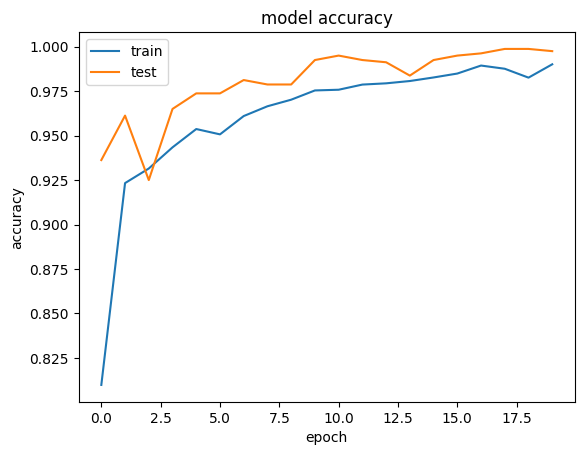

In [53]:
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [51]:
#Evaluation of the Model
alexnet.evaluate(test_generator,batch_size = 32)

31/31 [==============================] - 1s 32ms/step - loss: 0.1277 - accuracy: 0.9849


[0.127742737531662, 0.9848790168762207]

##### model seems to perform well on the given dataset and also the evalution on the test data gives good result

### improving the alexnet architecture

In [52]:
#using data agumentation and working
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datgen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (227,227),
    batch_size = 32,
    class_mode = 'binary',
)

alexnet = Sequential()
alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                   padding='valid', activation='relu',
                   input_shape=(227, 227, 3),
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))
alexnet.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(1000, activation='relu'))
alexnet.add(Dense(1, activation='sigmoid'))  # Binary classification

alexnet.summary()

# Optionally, switch to SGD for training
optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Use SGD if desired
alexnet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = alexnet.fit(train_generator, epochs=20, validation_data=val_generator)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 384)       885120

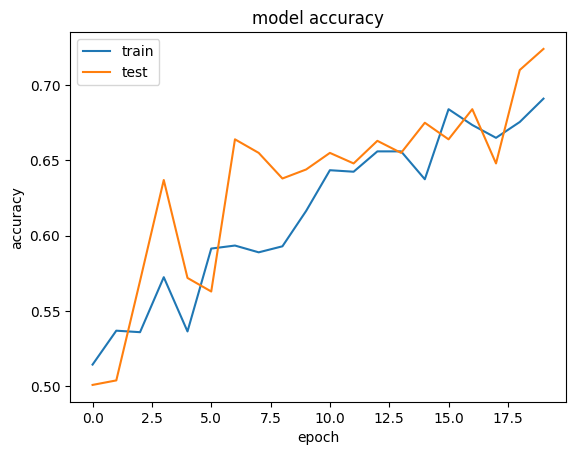

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#got a more less overfit model even though a bit less accuracy

In [54]:
alexnet.evaluate(test_generator,batch_size = 32)

31/31 [==============================] - 1s 32ms/step - loss: 0.0133 - accuracy: 0.9960


[0.013320219703018665, 0.9959677457809448]

#### the model perfromance improves and good results obtained with the test data as well and alexnet performs better compared to lenet for this dataset